 # Machine Learning (ML) - Classification
 
## Mushroom Classification Project

#### By : Aishah Alanazi &Hussain Alsultan and Shaikha Saud.

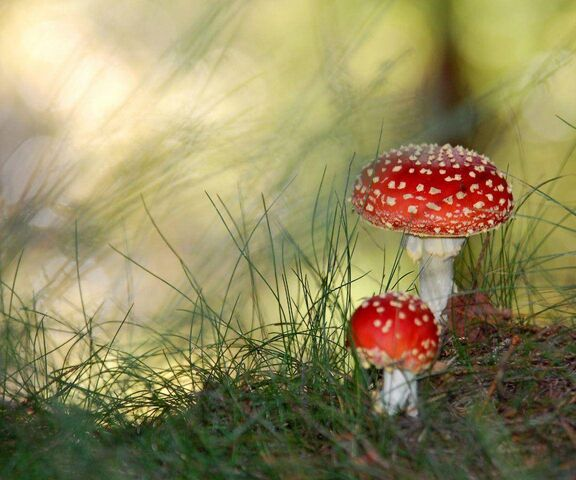

## __Contents:__
> 1. Overview
> 2. Installation
> 3. Read the dataset
> 4. Explore Information
> 5. Cleaning the dataset
> 6. Explore Data Analysis(EDA)
>> 1. Questions & Answers
> 7.ML models
>> 1. Logistic Regression
>> 2. Naive Bayes
>> 3. Random Forest Classifier
>> 4. Extreme Gradient Boost
>> 5. K-Nearest Neighbour
>> 6. Decision Tree
>> 7. Support Vector Machine
> 8.Ensembling 
 




## __Overview:__

In this project we take the dataset from kaggle [here](https://www.kaggle.com/uciml/mushroom-classification)

## __Installation:__

In [7]:
# !pip install plotly_express
# !pip install seaborn
!pip install mlxtend;  
!pip install graphviz;
!pip install xgboost;


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV,  Ridge, LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn import neighbors
from mlxtend.classifier import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,  precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from mlxtend.classifier import StackingCVClassifier

In [9]:


import scipy
import urllib
import sklearn

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

________________________________________________________________________

## __Read the Dataset:__

In [11]:
# Import Mushroom Classification dataset

df= pd.read_csv("mushrooms.csv")
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## __Explore Information:__

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
df.size

186852

In [15]:
df.shape

(8124, 23)

In [16]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [17]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [18]:
df.duplicated().sum()


0

In [19]:
#checking for nulls9ol. 
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## __Explore Information:__

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [21]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [22]:
df.size

186852

In [23]:
df.shape

(8124, 23)

In [24]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [25]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

________________________________________________________________

## __Cleaning the Dataset:__

In [26]:
df.drop_duplicates()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [27]:
print(df.duplicated().sum())


0


In [28]:
"""
fetal=df["class"]
plt.figure(figsize=(9,6))
sns.boxplot(x=fetal,y="class",data=df,palette="Blues")
plt.title("Number of poisonous/edible mushrooms")
"""

'\nfetal=df["class"]\nplt.figure(figsize=(9,6))\nsns.boxplot(x=fetal,y="class",data=df,palette="Blues")\nplt.title("Number of poisonous/edible mushrooms")\n'

In [29]:
# Unique values in columns
for column in df.columns:
    print(f"{column} : {df[column].unique()}")


class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [30]:
detail_df=df.copy()
feature_name_detail = {
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape": {'b':"bell","c":"conical","x":"convex","f":"flat", "k":"knobbed","s":"sunken"},
    'cap-surface': {'f':"fibrous","g":"grooves","y":"scaly","s":"smooth"},
    "cap-color": {'n':"brown",'b':'buff','c':'cinnamon','g':'gray','r':"green",'p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t': 'bruises', 'f': 'no'},
    "odor":{'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    "gill-attachment":{'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    "gill-spacing":{'c': 'close', 'w': 'crowded', 'd': 'distant'},
    "gill-size":{'b': 'broad', 'n': 'narrow'},
    "gill-color":{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': ' green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-shape":{'e': 'enlarging', 't': 'tapering'},
    "stalk-root":{'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    "stalk-surface-above-ring":{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-surface-below-ring":{'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-color-above-ring":{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-color-below-ring":{'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "veil-type":{'p': 'partial', 'u': 'universal'},
    "veil-color":{'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    "ring-number":{'n': 'none', 'o': 'one', 't': 'two'},
    "ring-type":{'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    "spore-print-color":{'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    "population":{'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    "habitat":{'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}
for column in detail_df.columns:
    df_dict =feature_name_detail[column]
    for index in range(len(detail_df[column])):
        detail_df[column][index]=df_dict [detail_df[column][index]]

In [31]:
detail_df.head(7)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows


In [32]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Explore Data Analysis(**EDA**):

### Questions & Answers:

#### 1.How many poisonous and edible mushrooms? 

C:\Users\aisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


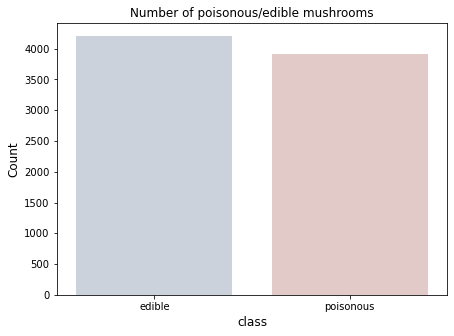

In [33]:
count =detail_df ['class'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="vlag")
plt.ylabel('Count', fontsize=12)
plt.xlabel('class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')

plt.show()


## - mushroom cap shapes-


## 1.Edible and poisonous mushrooms based on cap-shape
#### 2. Edible and poisonous mushrooms based on ODOR
#### 3. Edible and poisonous mushrooms based on gill-attachment
#### 4. Edible and poisonous mushrooms based on gill-color
#### 5.Edible and poisonous mushrooms based on stalk-root
#### 6. Edible and poisonous mushrooms based on stalk-color-above-ring
#### 7. Edible and poisonous mushrooms based on stalk-color-below-ring
#### 8. Edible and poisonous mushrooms based on ring-type 

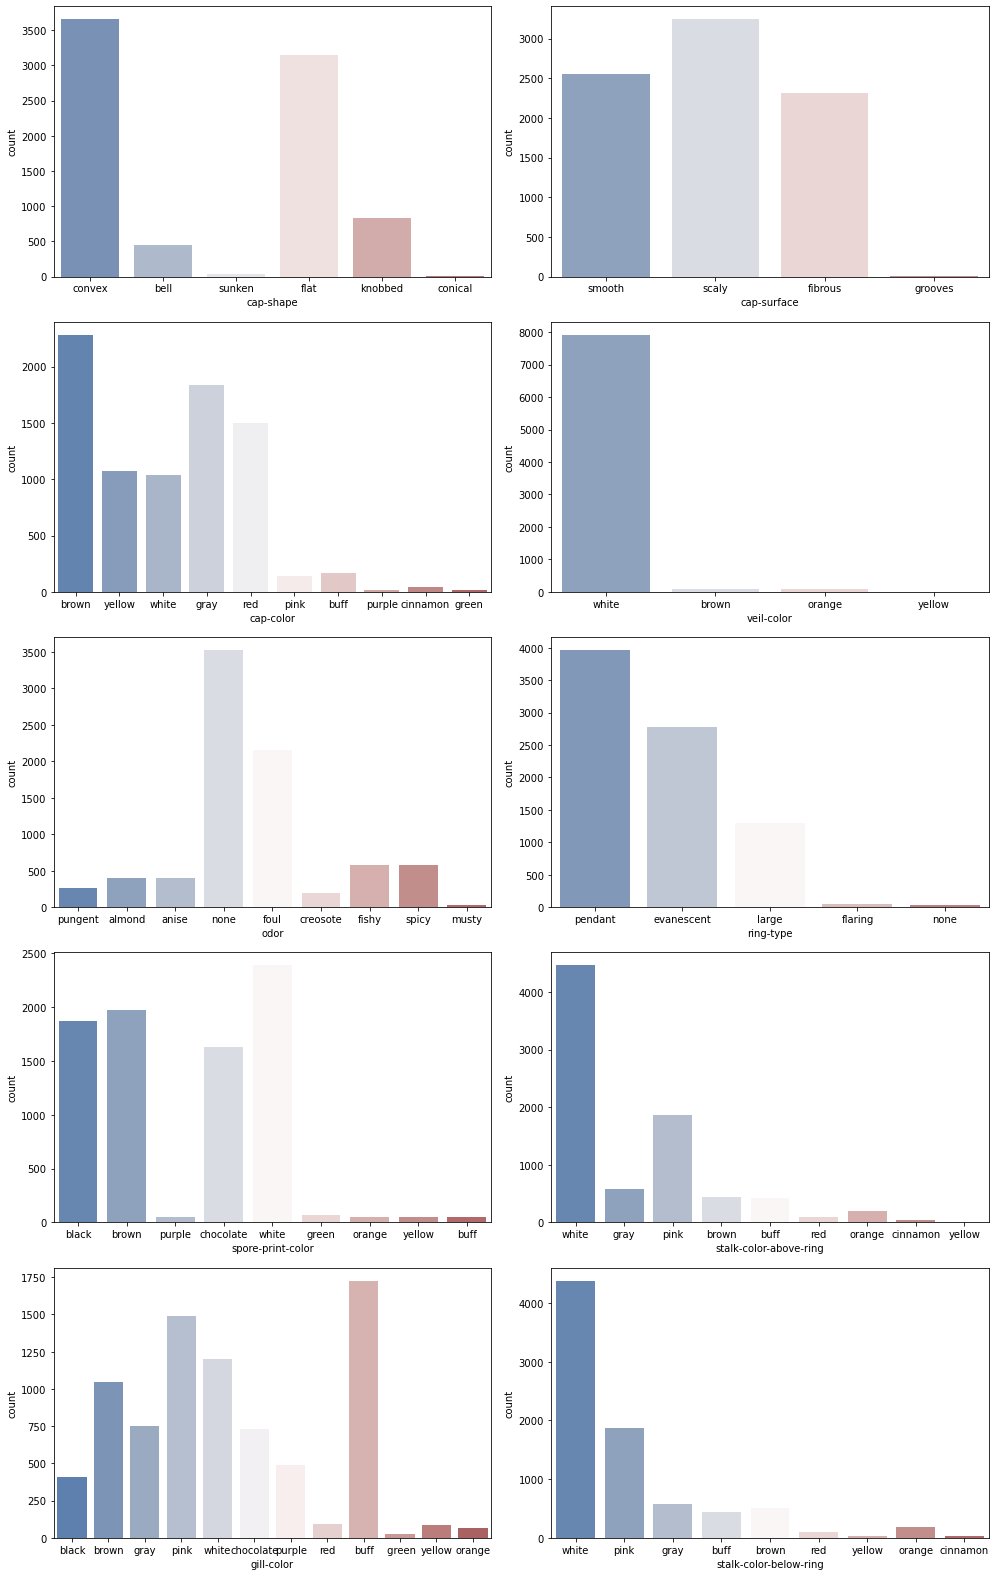

In [34]:
fig=plt.figure(figsize = (14,22)) 
columns = 2
rows = 5 
column_names = ['cap-shape', 'cap-surface', 'cap-color', 'veil-color', 'odor',
       'ring-type', 'spore-print-color', 'stalk-color-above-ring', 'gill-color',
       'stalk-color-below-ring']
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i) 
    sns.countplot(x = column_names[i-1],data =detail_df ,palette = 'vlag')
fig.tight_layout()
plt.show()

In [35]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [36]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [37]:

df['class'].value_counts()


0    4208
1    3916
Name: class, dtype: int64

### * Poisonous/Edible Mushroom Features *

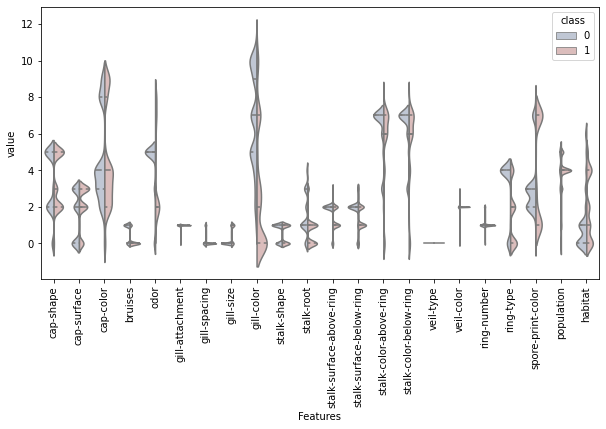

In [38]:
df_4 = pd.melt(df, "class", var_name="Features") # palette = "crest"
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Features", y="value", hue="class", split = True, data=df_4, inner = 'quartile', palette = 'vlag')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

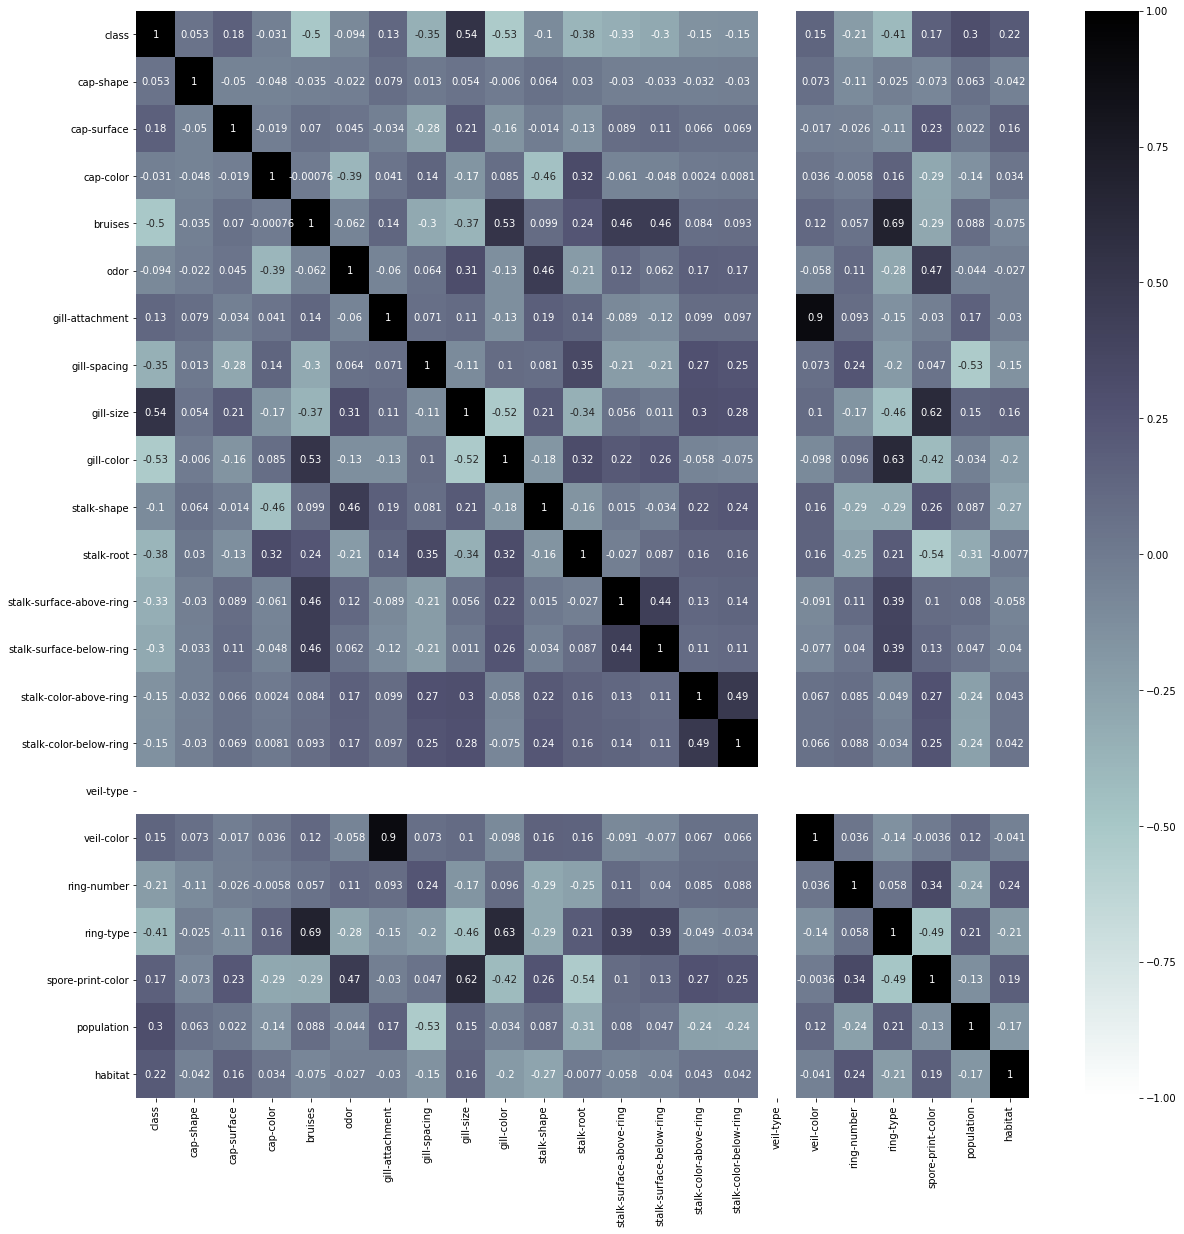

In [39]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(),cmap='bone_r',vmin=-1, vmax=1, annot=True)       

In [40]:
fetcher_X=df.drop('class', axis=1)
fetcher_y=df["class"]

In [41]:
from sklearn.feature_selection import SelectPercentile

In [42]:
from sklearn.feature_selection import chi2 , f_classif

In [43]:
print('Original X Shape is ' , fetcher_X.shape)
FeatureSelection = SelectPercentile(score_func = chi2, percentile=20) # score_func can = f_classif
A = FeatureSelection.fit_transform(fetcher_X, fetcher_y)

Original X Shape is  (8124, 22)


In [44]:
print('Selected Features are : ' , FeatureSelection.get_support())

Selected Features are :  [False False False  True False False False  True  True False  True False
 False False False False False False  True False False False]


In [45]:
print('X Shape is ' , A.shape)

X Shape is  (8124, 5)


In [46]:
y=df["class"]
df= df.filter(['cap-color','gill-spacing',"gill-size","stalk-shape","ring-number"], axis=1)
X=df

In [47]:
df.columns

Index(['cap-color', 'gill-spacing', 'gill-size', 'stalk-shape', 'ring-number'], dtype='object')

In [48]:
type(df)

pandas.core.frame.DataFrame


df.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

X_prime = df[['gill-color', 'ring-type', 'spore-print-color', 'population','habitat']].values
y = df.iloc[:,9].values

X = preprocessing.scale(x)

In [49]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.2, random_state=17)

# ML models


### Here I take different machine learning algorithm and try find algorithm which predict accurately.


## __Models:__
> 1. K-Nearest Neighbour
> 2. Random Forest Classifier
> 3. Decision Tree
> 4. Logistic Regression
> 5. Naive Bayes
> 6. Support Vector Classifier
> 7. Extreme Gradient Boost

### K-Nearest Neighbour


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
k_range = list(range(1,30))

param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid,cv=10,scoring='accuracy')
grid.fit(X_train,y_train)
print("Best params:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Best score:", grid.best_score_)


Best params: {'n_neighbors': 9}
Best estimator: KNeighborsClassifier(n_neighbors=9)
Best score: 0.9198373829560271


In [65]:
m1 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)                              
sns.heatmap(rf_conf_matrix, annot= True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('actual')
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[718 108]
 [ 19 780]]




NameError: name 'knn_acc_score' is not defined

__________________________________________

## Random Forest


In [67]:
param_dict_rf = {

    'n_estimators': range(1,20),
    'random_state': range(1,10),
    'max_depth': range(1,10),

}

In [68]:
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf,
                   param_grid=param_dict_rf,
                   cv=5,
                   verbose=1,
                   n_jobs=-1)
grid_rf.fit(X_train,y_train)
print("Best params:", grid_rf.best_params_)
print("Best estimator:", grid_rf.best_estimator_)
print("Best score:", grid_rf.best_score_)

Fitting 5 folds for each of 1539 candidates, totalling 7695 fits
Best params: {'max_depth': 6, 'n_estimators': 6, 'random_state': 6}
Best estimator: RandomForestClassifier(max_depth=6, n_estimators=6, random_state=6)
Best score: 0.9266053177000059


confusion matrix
[[724 102]
 [ 44 755]]


Accuracy of Random Forest: 91.01538461538462 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       826
           1       0.88      0.94      0.91       799

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



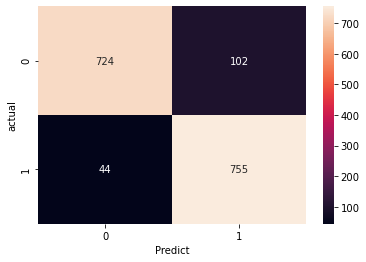

In [69]:
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
sns.heatmap(rf_conf_matrix, annot= True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('actual')
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

### Decision Tree 

In [52]:
param_dict_dt_de = {

    
    'criterion': ['gini','entropy'],
    "random_state":[0],
    "max_depth" : [6]
    
}

In [53]:
dt_3 = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt_3,
                   param_grid=param_dict_dt_de,
                   cv=5,
                   verbose=1,
                   n_jobs=-1)
grid_dt.fit(X_train,y_train)
print("Best params:", grid_dt.best_params_)
print("Best estimator:", grid_dt.best_estimator_)
print("Best score:", grid_dt.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best params: {'criterion': 'gini', 'max_depth': 6, 'random_state': 0}
Best estimator: DecisionTreeClassifier(max_depth=6, random_state=0)
Best score: 0.9266053177000059


In [56]:
m3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
#sns.heatmap(rf_conf_matrix, annot= True,fmt='d')
#plt.xlabel('Predict')
#plt.ylabel('actual')
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))    

confussion matrix
[[744  82]
 [ 33 766]]


Accuracy of DecisionTreeClassifier: 92.92307692307692 

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       826
           1       0.90      0.96      0.93       799

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



### Logistic Regression

In [58]:
m4 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
#sns.heatmap(rf_conf_matrix, annot= True,fmt='d')
#plt.xlabel('Predict')
#plt.ylabel('actual')
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[606 220]
 [ 67 732]]


Accuracy of Logistic Regression: 82.33846153846154 

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       826
           1       0.77      0.92      0.84       799

    accuracy                           0.82      1625
   macro avg       0.83      0.82      0.82      1625
weighted avg       0.84      0.82      0.82      1625



### Naive Bayes

confussion matrix
[[274 552]
 [ 39 760]]


Accuracy of Naive Bayes model: 63.63076923076923 

              precision    recall  f1-score   support

           0       0.88      0.33      0.48       826
           1       0.58      0.95      0.72       799

    accuracy                           0.64      1625
   macro avg       0.73      0.64      0.60      1625
weighted avg       0.73      0.64      0.60      1625



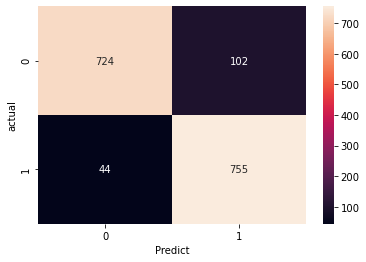

In [81]:
m5 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
sns.heatmap(rf_conf_matrix, annot= True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('actual')
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

### Support Vector Classifier

confussion matrix
[[721 105]
 [ 45 754]]


Accuracy of Support Vector Classifier: 90.76923076923077 

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       826
           1       0.88      0.94      0.91       799

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



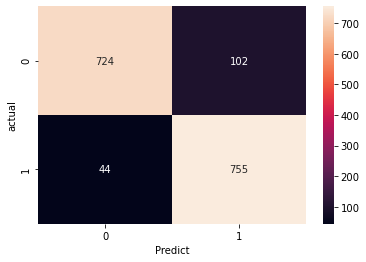

In [82]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
sns.heatmap(rf_conf_matrix, annot= True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('actual')
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

## Extreme Gradient Boost

In [59]:
xgb=XGBClassifier()

In [60]:
xgb=XGBClassifier(colsample_bytree= 0.6, gamma= 1.5, max_depth= 5,min_child_weight= 1,subsample= 1.0)

C:\Users\aisha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[725 101]
 [ 65 734]]


Accuracy of Extreme Gradient Boost: 89.78461538461538 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       826
           1       0.88      0.92      0.90       799

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



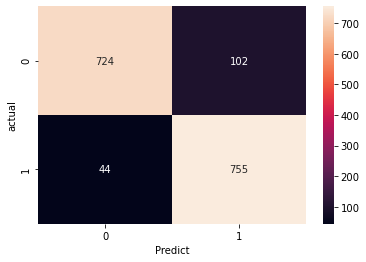

In [83]:
!pip install xgboost
m7 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
sns.heatmap(rf_conf_matrix, annot= True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('actual')
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

In [74]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

NameError: name 'nbpred' is not defined

In [75]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

NameError: name 'nb_acc_score' is not defined

NameError: name 'model_ev' is not defined

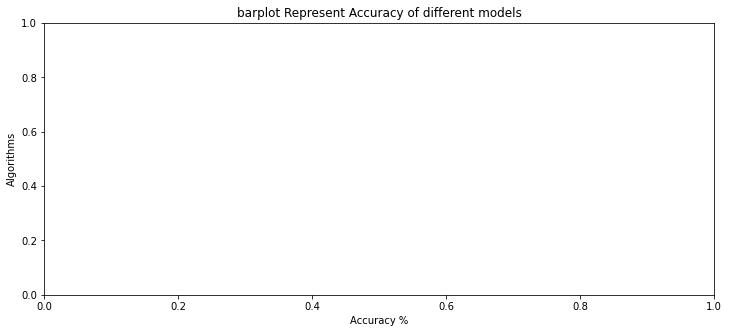

In [76]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.barh(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Ensembling


In [63]:
!pip install mlxtend
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

NameError: name 'svc' is not defined

In [86]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

[13:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aisha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aisha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\aisha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[13:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[718 108]
 [ 19 780]]


Accuracy of StackingCVClassifier: 92.18461538461538 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       826
           1       0.88      0.98      0.92       799

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625

